## Importing neccessary libraries

Pickle library is imported to load  pre trained machine learning models which are saved in pickle file format. Pandas library is used to read and manipulate data sets as data frame objects. Numpy library which is normally used for numerical analysis is used here to create an array that contains input for predict method of various machine learning models. 

In [1]:
!conda activate surya

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The observational dataset is imported from the csv file and saved as a pandas data frame in variable grd.

In [3]:
gr_data = pd.read_csv("../data/graphene_data_final.csv")

The 1st four columns Graphene_percentage, feed, RPM and DOC were taken as input and MRR as 2st output and `Ra` as 2nd output.

In [4]:
X = gr_data[['Graphene_percentage', 'FEED', 'RPM', 'DOC']]
Y = gr_data['MRR_gm_per_sec']
Y2 = gr_data['Ra']

## Loading previously saved models

The machine learning models which were created using scikit learn were saved as pickle files and tensorflow models were saved as h5 files. Now those saved models are being loaded from the model files.

In [5]:
with open('../trained_models/decision_tree_RA.pkl', 'rb') as p:
    dtr_ra = pickle.load(p)

In [6]:
with open('../trained_models/decision_tree_MRR.pkl', 'rb') as p:
    dtr_mrr = pickle.load(p)

In [7]:
with open('../trained_models/random_forest_MRR.pkl', 'rb') as p:
    rfr_mrr = pickle.load(p)

In [8]:
with open('../trained_models/random_forest_RA.pkl', 'rb') as p:
    rfr_ra = pickle.load(p)

In [9]:
with open('../trained_models/gradient_boosting_MRR.pkl', 'rb') as p:
    gbr_mrr = pickle.load(p)

In [10]:
with open('../trained_models/gradient_boosting_RA.pkl', 'rb') as p:
    gbr_ra = pickle.load(p)

In [11]:
with open('../trained_models/ANN_RA_sklearn.pkl', 'rb') as p:
    ann_sk_ra = pickle.load(p)

In [12]:
with open('../trained_models/ANN_MRR_sklearn.pkl', 'rb') as p:
    ann_sk_mrr = pickle.load(p)

## Prediction of MRR and Ra

### For predicting target values from feature(input) values of original dataset

In this section the feature values are not taken directly from the user rather the prompt asks for the serial number of observation from the original dataset. Then through slicing of dataframe using the entered serial number the program gets the corresponding input values. After getting the 4 input values it feeds them to the loaded models and displays the predicted output.

In [13]:
a_ = int(input("Enter the serial number of observation(1 to 135): "))
b_ = a_ + 1

Enter the serial number of observation(1 to 135):  29


In [14]:
print("Prediction of MRR by random forest is "+str(rfr_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Prediction of MRR by decision tree is "+str(dtr_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Prediction of MRR by gradient boosting is "+str(gbr_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Prediction of MRR by ann is "+str(ann_sk_mrr.predict(X[a_:b_].to_numpy())[0]))
print("Real value of MRR is "+str(Y[a_:b_].to_numpy()[0]))

Prediction of MRR by random forest is 0.02639234842829693
Prediction of MRR by decision tree is 0.02614316033142028
Prediction of MRR by gradient boosting is 0.027165799236216235
Prediction of MRR by ann is 2.9573546149595766
Real value of MRR is 0.027698945349953


c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


## Material Removal Rate predictor model perfomance graph

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


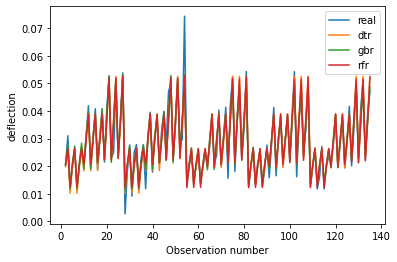

In [15]:
#y_axis_mrr = [rfr_mrr_op,dtr_mrr_op,gbr_mrr_op,ann_mrr_op,real_mrr_op]
a_ = 1
b_ = 135
b_ = b_+1
rfr_mrr_op = list(rfr_mrr.predict(X.to_numpy()))[a_:b_]
dtr_mrr_op = list(dtr_mrr.predict(X.to_numpy()))[a_:b_]
gbr_mrr_op = list(gbr_mrr.predict(X.to_numpy()))[a_:b_]
ann_mrr_op = list(ann_sk_mrr.predict(X.to_numpy()))[a_:b_]
real_mrr_op = list(Y.to_numpy())[a_:b_]
x_mrr = list(np.arange(1,136))[a_:b_]
fig2, ax2 = plt.subplots()

ax2.plot(x_mrr,real_mrr_op,label= "real")
ax2.plot(x_mrr,dtr_mrr_op,label = "dtr")
ax2.plot(x_mrr,gbr_mrr_op,label = "gbr")
ax2.plot(x_mrr,rfr_mrr_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


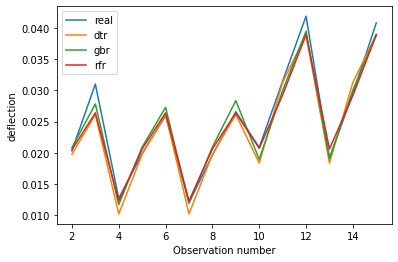

In [16]:
#y_axis_mrr = [rfr_mrr_op,dtr_mrr_op,gbr_mrr_op,ann_mrr_op,real_mrr_op]
a_ = 1
b_ = 14
b_ = b_+1
rfr_mrr_op = list(rfr_mrr.predict(X.to_numpy()))[a_:b_]
dtr_mrr_op = list(dtr_mrr.predict(X.to_numpy()))[a_:b_]
gbr_mrr_op = list(gbr_mrr.predict(X.to_numpy()))[a_:b_]
ann_mrr_op = list(ann_sk_mrr.predict(X.to_numpy()))[a_:b_]
real_mrr_op = list(Y.to_numpy())[a_:b_]
x_mrr = list(np.arange(1,136))[a_:b_]
fig2, ax2 = plt.subplots()

ax2.plot(x_mrr,real_mrr_op,label= "real")
ax2.plot(x_mrr,dtr_mrr_op,label = "dtr")
ax2.plot(x_mrr,gbr_mrr_op,label = "gbr")
ax2.plot(x_mrr,rfr_mrr_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

## Surface Roughness prediction using known data

In [17]:
rfr_ra_op = rfr_ra.predict(X[a_:b_].to_numpy())[0]
dtr_ra_op = dtr_ra.predict(X[a_:b_].to_numpy())[0]
gbr_ra_op = gbr_ra.predict(X[a_:b_].to_numpy())[0]
ann_ra_op = ann_sk_ra.predict(X[a_:b_].to_numpy())[0]
real_ra_op = Y2[a_:b_].to_numpy()[0]

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [18]:
print("Prediction of RA by random forest is "+str(rfr_ra_op))
print("Prediction of RA by decision tree is "+str(dtr_ra_op))
print("Prediction of RA by gradient boosting is "+str(gbr_ra_op))
print("Prediction of RA by ann is "+str(ann_ra_op))
print("Real value of RA is "+str(real_ra_op))

Prediction of RA by random forest is 0.9071999999999999
Prediction of RA by decision tree is 0.6342000000000001
Prediction of RA by gradient boosting is 0.6998388778769566
Prediction of RA by ann is -67.31170388262869
Real value of RA is 0.959


## Surface Roughness predictor model perfomance graph

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


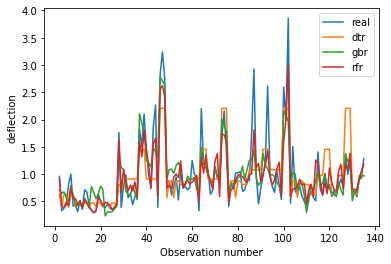

In [19]:
#y_axis_mrr = [rfr_mrr_op,dtr_mrr_op,gbr_mrr_op,ann_mrr_op,real_mrr_op]
a_ = 1
b_ = 135
b_ = b_+1
rfr_ra_op = list(rfr_ra.predict(X.to_numpy()))[a_:b_]
dtr_ra_op = list(dtr_ra.predict(X.to_numpy()))[a_:b_]
gbr_ra_op = list(gbr_ra.predict(X.to_numpy()))[a_:b_]
ann_ra_op = list(ann_sk_ra.predict(X.to_numpy()))[a_:b_]
real_ra_op = list(Y2.to_numpy())[a_:b_]
x_mrr = list(np.arange(1,136))[a_:b_]
fig, ax = plt.subplots()

ax.plot(x_mrr,real_ra_op,label= "real")
ax.plot(x_mrr,dtr_ra_op,label = "dtr")
ax.plot(x_mrr,gbr_ra_op,label = "gbr")
ax.plot(x_mrr,rfr_ra_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


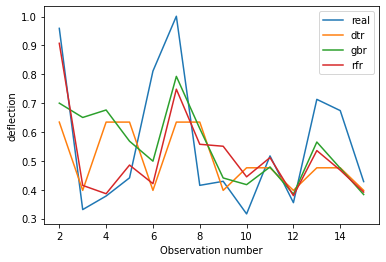

In [20]:
a_ = 1
b_ = 14
b_ = b_+1
rfr_ra_op = list(rfr_ra.predict(X.to_numpy()))[a_:b_]
dtr_ra_op = list(dtr_ra.predict(X.to_numpy()))[a_:b_]
gbr_ra_op = list(gbr_ra.predict(X.to_numpy()))[a_:b_]
ann_ra_op = list(ann_sk_ra.predict(X.to_numpy()))[a_:b_]
real_ra_op = list(Y2.to_numpy())[a_:b_]
x_mrr = list(np.arange(1,136))[a_:b_]
fig, ax = plt.subplots()

ax.plot(x_mrr,real_ra_op,label= "real")
ax.plot(x_mrr,dtr_ra_op,label = "dtr")
ax.plot(x_mrr,gbr_ra_op,label = "gbr")
ax.plot(x_mrr,rfr_ra_op,label = "rfr")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

### For predicting target values using unknown feature(input) values

In [21]:
for i in X.columns:
    print(str(i) +" "+str(X[i].unique()))

Graphene_percentage [0.    0.005 0.01  0.02  0.03 ]
FEED [100 150 200]
RPM [1000 2000 3000]
DOC [0.1  0.15 0.2 ]


Here the unique values of each feature variables of the original dataset is shown to let the user know using which range of variables the models were trained on.

In this section the prompt asks for the four input values to the user and it shows the predicted output.

In [22]:
Graphene_percentage = float(input("Enter the graphene percentage: "))
FEED = int(input("Enter the Feed: "))
RPM = int(input("Enter the rotation in RPM: "))
DOC = float(input("Enter the DOC: "))

Enter the graphene percentage:  0.01
Enter the Feed:  100
Enter the rotation in RPM:  10000
Enter the DOC:  0.15


In [23]:
inp_ = np.array([[Graphene_percentage,FEED,RPM,DOC]])

In [24]:
print("Prediction of MRR and RA by random forest is "+str(rfr_mrr.predict(inp_)[0])+
" and "+str(rfr_ra.predict(inp_)[0]))
print("Prediction of MRR and RA by decision tree is "+str(dtr_mrr.predict(inp_)[0])+
" and "+str(dtr_ra.predict(inp_)[0]))
print("Prediction of MRR and RA by gradient boosting is "+str(gbr_mrr.predict(inp_)[0])+
" and "+str(gbr_ra.predict(inp_)[0]))
print("Prediction of MRR and RA by sklearn ANN is "+str(ann_sk_mrr.predict(inp_)[0])+
" and "+str(ann_sk_ra.predict(inp_)[0]))

Prediction of MRR and RA by random forest is 0.02063465410465776 and 0.9758944444444444
Prediction of MRR and RA by decision tree is 0.019772264302238385 and 0.9105555555555553
Prediction of MRR and RA by gradient boosting is 0.02037440369915791 and 0.7186872181524806
Prediction of MRR and RA by sklearn ANN is 6.958046260033551 and -697.9652760504273


c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not